# Bab Pengenalan

Nama : Praduta Firman Anugrah

Batch : FTDS-002

Sumber Dataset : https://www.kaggle.com/arjunbhasin2013/ccdata

Dataset : This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading

In [2]:
df = pd.read_csv("CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# Data Cleaning

In [9]:
col_to_use = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

df = df[col_to_use]

melakukan drop untuk features 'CUST_ID' karena tidak diperlukan dalam proses modeling

In [10]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing values pada minimum payments dan credit limit

Mengatasi missing values

In [11]:
df.dropna(inplace=True)

Mengecek kembali apakah sudah tidak ada missing values

In [12]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Eksplorasi Data

In [13]:
discrete_features = [var for var in df.columns if df[var].dtypes == 'int']

print("variabel yang termasuk dalam dicrete features adalah: \n", discrete_features)

variabel yang termasuk dalam dicrete features adalah: 
 []


In [14]:
for feature in discrete_features:
    data = df.copy()
    
    data.groupby(feature)['PURCHASES'].median().plot.bar(figsize=(15,8))
    plt.xlabel(feature)
    plt.ylabel('PURCHASES')
    plt.title(feature)
    plt.show()

In [15]:
continous_features = [var for var in df.columns if df[var].dtypes == 'float' and var not in ['PURCHASES']]


print("variabel yang termasuk dalam continous features adalah: \n", continous_features)

variabel yang termasuk dalam continous features adalah: 
 ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


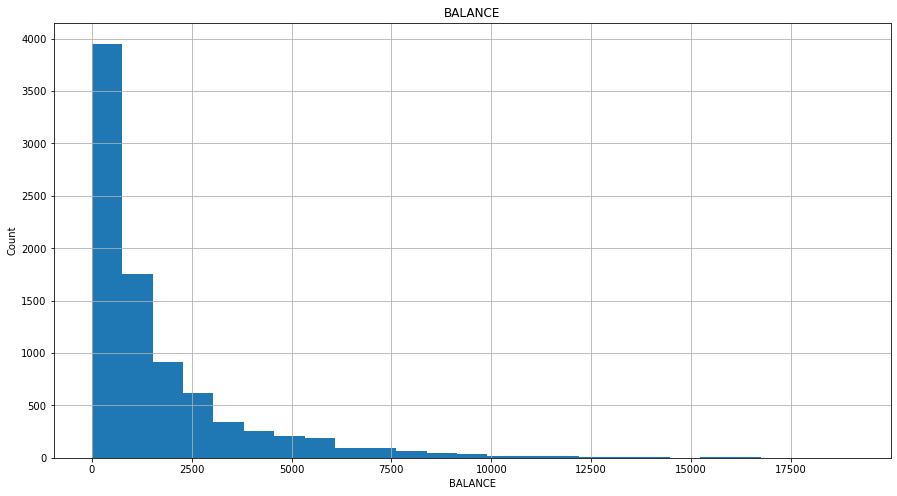

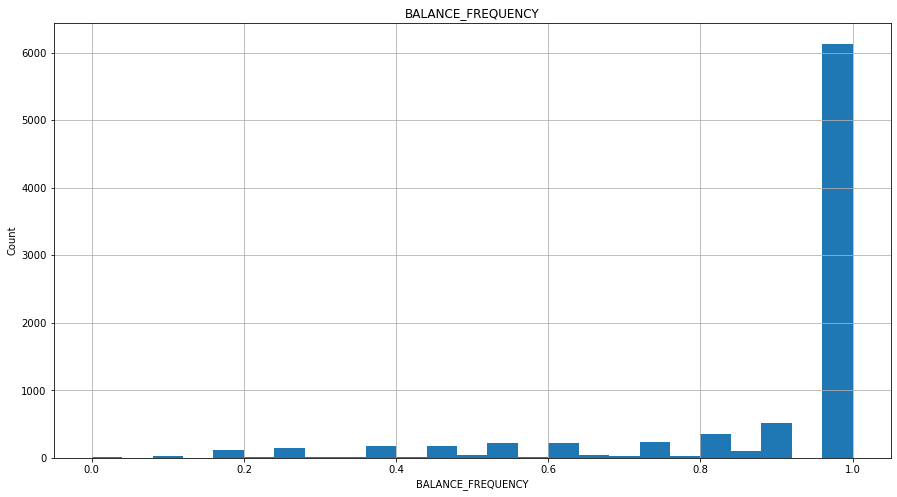

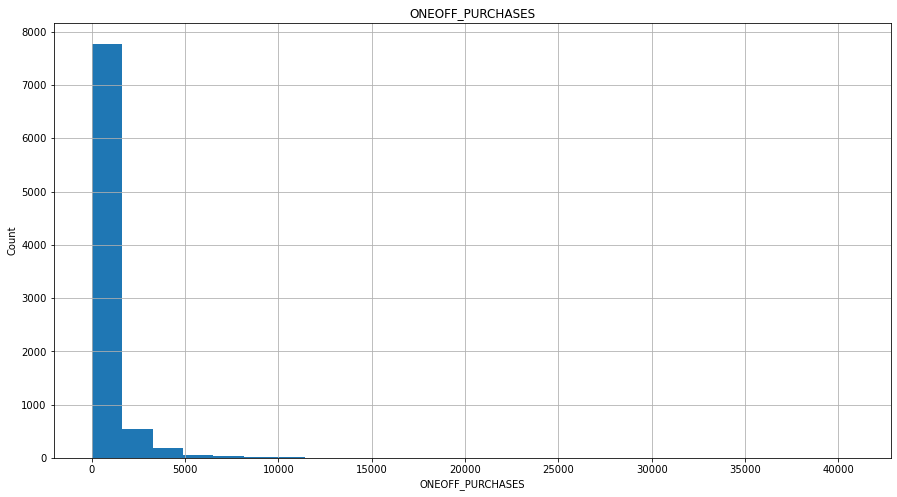

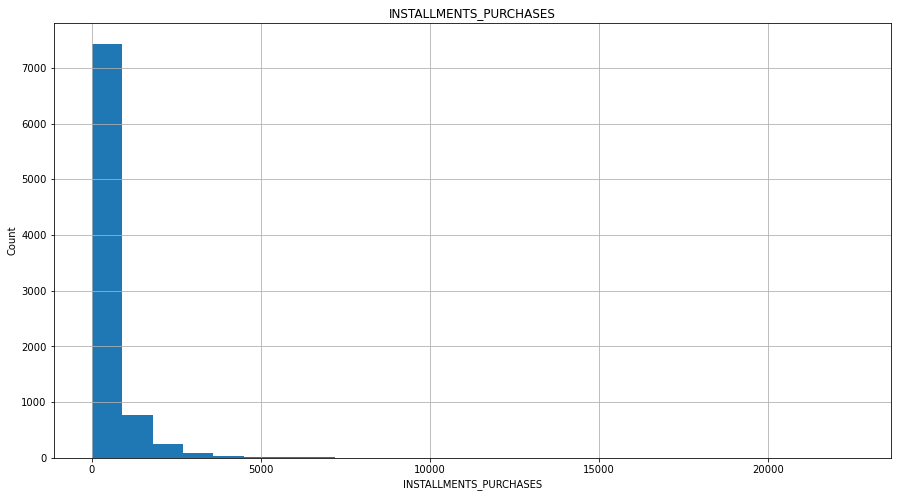

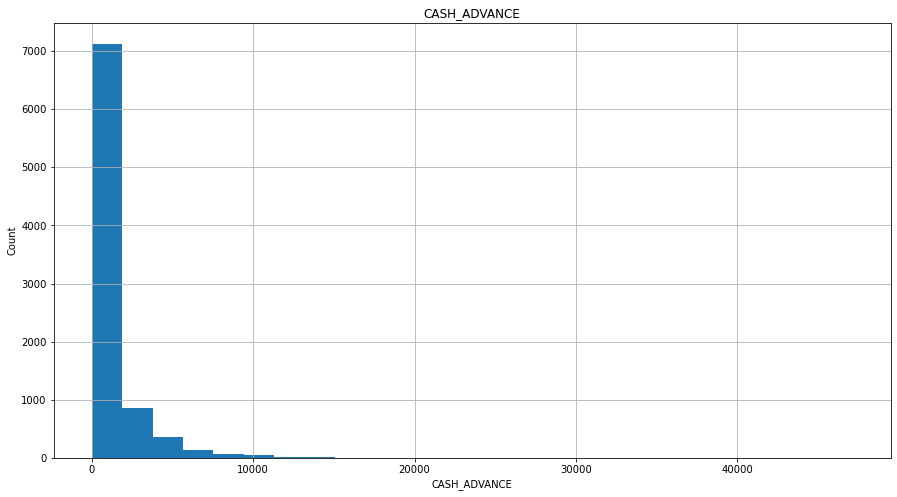

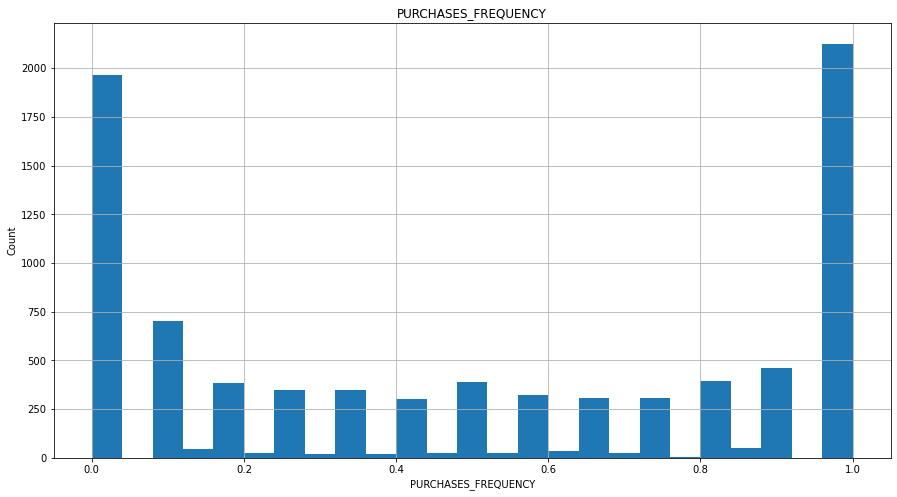

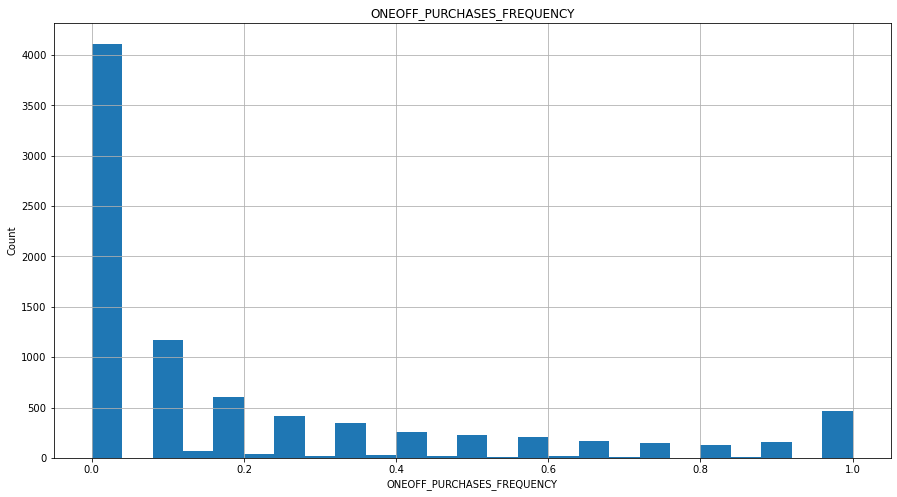

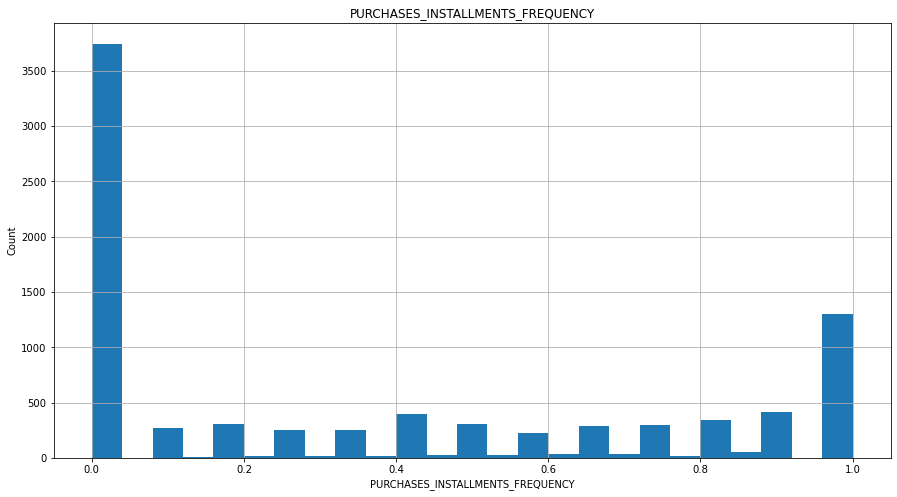

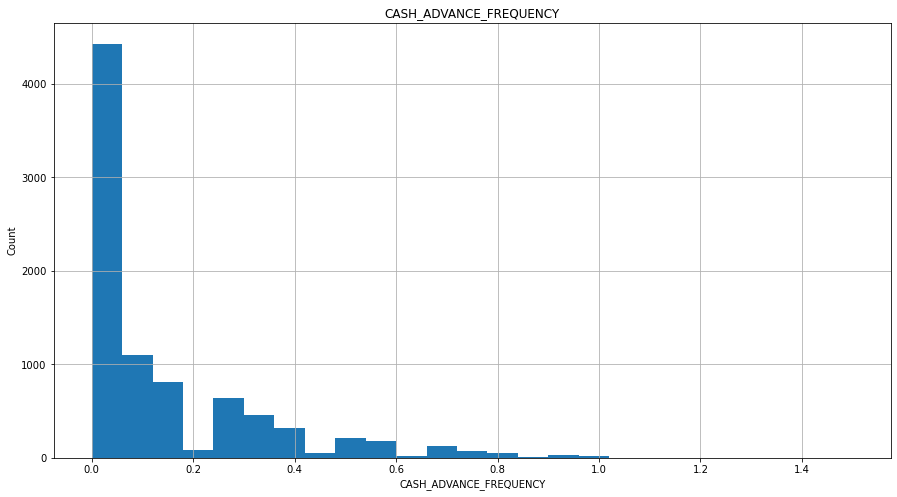

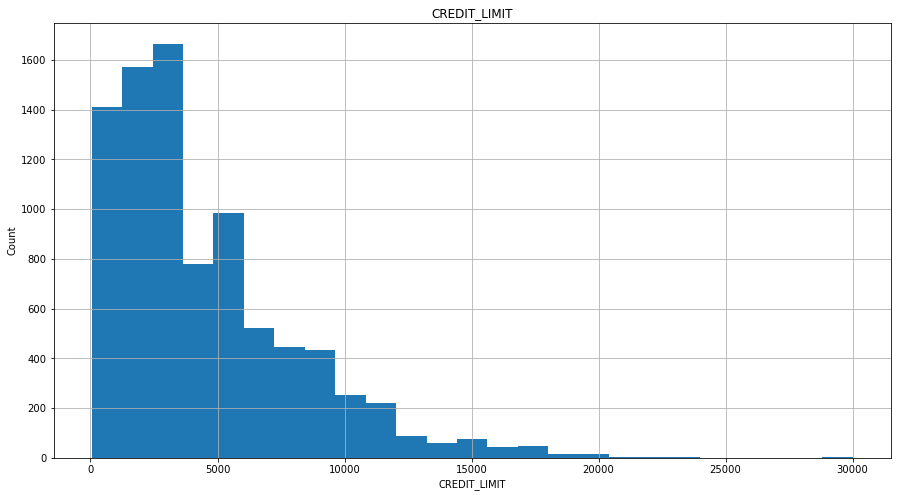

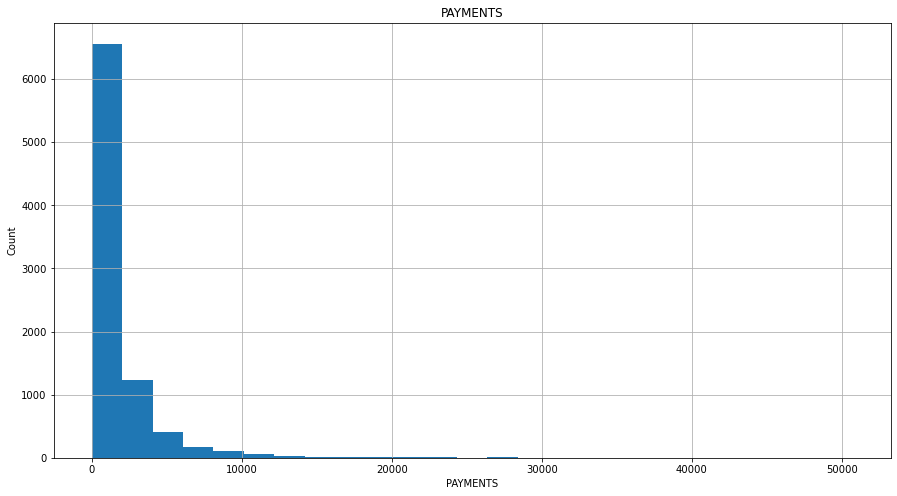

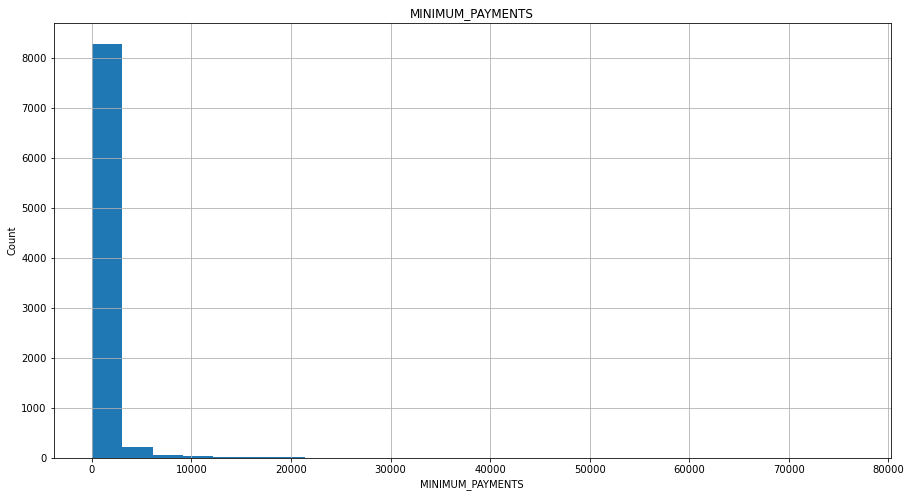

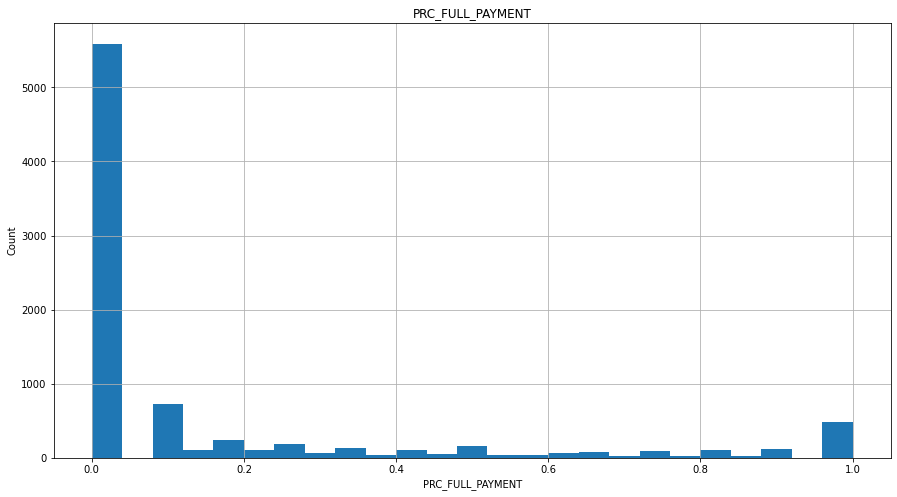

In [16]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins=25, figsize=(15,8))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


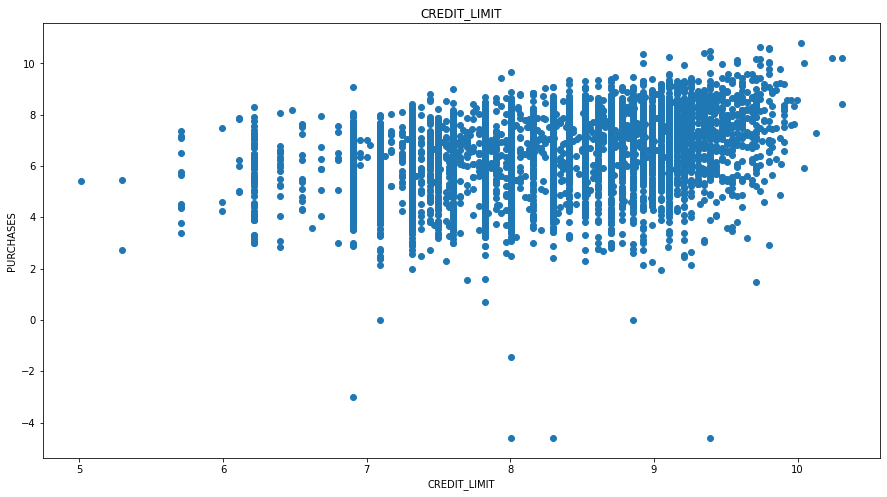

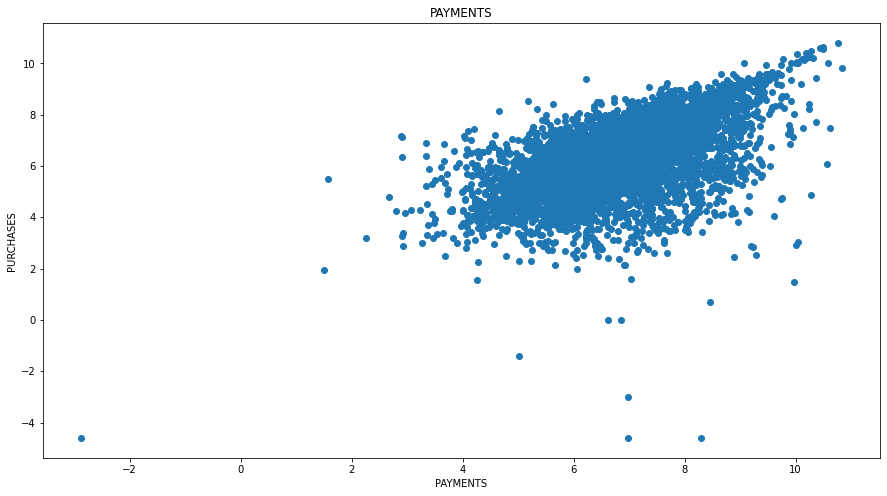

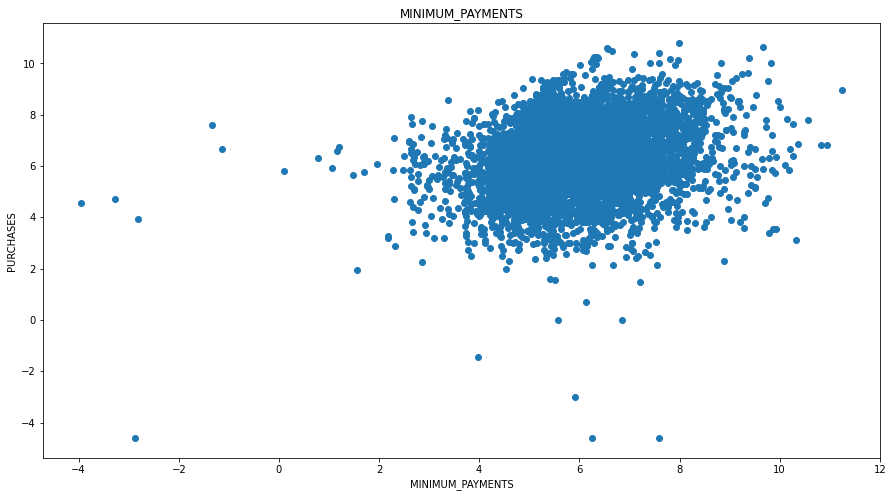

In [17]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['PURCHASES']=np.log(data['PURCHASES'])
        plt.subplots(figsize=(15,8))
        plt.scatter(data[feature],data['PURCHASES'])
        plt.xlabel(feature)
        plt.ylabel('PURCHASES')
        plt.title(feature)
        plt.show()

Ekplorasi Data Analysis : 

- Semakin besar nilai yang dibelanjakan oleh konsumen dengan menggunakan kartu kredit maka semakin besar juga Jumlah transaksi pembelian yang dilakukan, hal ini bisa diartikan bahwa konsumen tidak melakukan satu pembelian dengan nilai yang besar.

- Semakin besar Credit_Limit kartu kredit yang dimiliki oleh konsumen maka konsumen tersebut akan semakin tinggi didalam melakukan nilai transaksi pembelanjaan

- Semakin tinggi nilai pembelanjaan yang dilakukan oleh konsumen maka semakin besar nilai pembayaran yang berhasil dilakukan atau dengan kata lain tidak menunggak

- Semakin besar nilai tagihan minimum yang dibayarkan oleh konsumen maka akan semakin besar nilai yang dibelanjakan atau dengan kata lain konsumen selalu membayar sesuai dengan minimum tagihan dan tidak langsung melunasi tagihan kartu kredit

- Semakin lama tenure kartu kredit yang dimiliki oleh konsumen maka semakin besar jumlah yang dibelanjakan oleh konsumen

# Data Preprocessing

In [18]:
for col in df.columns:
    print(col,df[col].unique()[0:20], '\n')

BALANCE [  40.900749 3202.467416 2495.148862  817.714335 1809.828751  627.260806
 1823.652743 1014.926473  152.225975 1293.124939  630.794744 1516.92862
  921.693369 2772.772734 6886.213231 2072.074354   41.089489 1989.072228
 3577.970933 2016.684686] 

BALANCE_FREQUENCY [0.818182 0.909091 1.       0.545455 0.875    0.454545 0.636364 0.727273
 0.5      0.888889 0.272727 0.363636 0.666667 0.75     0.857143 0.090909
 0.333333 0.181818 0.6      0.3     ] 

PURCHASES [  95.4     0.    773.17   16.   1333.28 7091.01  436.2   861.49 1281.6
  920.12 1492.18 3217.99 2137.93 1611.7   519.    504.35  398.64  176.68
 6359.95  815.9 ] 

ONEOFF_PURCHASES [   0.    773.17   16.   6402.63  661.49 1281.6  1492.18 2500.23  419.96
  166.   5910.04 3454.56  102.    204.55 1013.2   400.    324.95  636.79
 1642.17  204.  ] 

INSTALLMENTS_PURCHASES [  95.4     0.   1333.28  688.38  436.2   200.    920.12  717.76 1717.97
 1611.7   519.    338.35  398.64  176.68  449.91  815.9   793.79  399.6
  233.28  182.5 

In [19]:
df['BALANCE'] = pd.cut(df['BALANCE'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['CASH_ADVANCE'] = pd.cut(df['CASH_ADVANCE'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['PURCHASES'] = pd.cut(df['PURCHASES'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['ONEOFF_PURCHASES'] = pd.cut(df['ONEOFF_PURCHASES'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['INSTALLMENTS_PURCHASES'] = pd.cut(df['INSTALLMENTS_PURCHASES'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['CREDIT_LIMIT'] = pd.cut(df['CREDIT_LIMIT'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['PAYMENTS'] = pd.cut(df['PAYMENTS'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['MINIMUM_PAYMENTS'] = pd.cut(df['MINIMUM_PAYMENTS'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
df['BALANCE_FREQUENCY'] = pd.cut(df['BALANCE_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
df['PURCHASES_FREQUENCY'] = pd.cut(df['PURCHASES_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
df['ONEOFF_PURCHASES_FREQUENCY'] = pd.cut(df['ONEOFF_PURCHASES_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
df['PURCHASES_INSTALLMENTS_FREQUENCY'] = pd.cut(df['PURCHASES_INSTALLMENTS_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
df['CASH_ADVANCE_FREQUENCY'] = pd.cut(df['CASH_ADVANCE_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
df['PRC_FULL_PAYMENT'] = pd.cut(df['PRC_FULL_PAYMENT'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
df['PURCHASES_TRX'] = pd.cut(df['PURCHASES_TRX'], [-1.0 , 5.0 , 10.0  , 20.0 , 30.0 , 40.0 , 50.0 , 100.0, 500 ], labels=[1,2,3,4,5,6,7,8]).astype('int64')
df['CASH_ADVANCE_TRX'] = pd.cut(df['CASH_ADVANCE_TRX'], [-1.0 , 5.0 , 10.0  , 20.0 , 30.0 , 40.0 , 50.0 , 100.0, 500 ], labels=[1,2,3,4,5,6,7,8]).astype('int64')
df['TENURE'] = pd.cut(df['TENURE'], [-1.0 , 5.0 , 10.0  , 20.0 , 30.0 , 40.0 , 50.0 , 100.0, 500 ], labels=[1,2,3,4,5,6,7,8]).astype('int64')

In [20]:
for col in df.columns:
    print(col,df[col].unique()[0:20], '\n')

BALANCE [1 4 3 2 5 6 7] 

BALANCE_FREQUENCY [1 0] 

PURCHASES [1 2 3 6 4 5 7] 

ONEOFF_PURCHASES [1 2 5 3 4 7 6] 

INSTALLMENTS_PURCHASES [1 3 2 4 5 7 6] 

CASH_ADVANCE [1 5 3 6 2 4 7] 

PURCHASES_FREQUENCY [0 1] 

ONEOFF_PURCHASES_FREQUENCY [0 1] 

PURCHASES_INSTALLMENTS_FREQUENCY [0 1] 

CASH_ADVANCE_FREQUENCY [0 1] 

CASH_ADVANCE_TRX [1 2 3 5 4 8 7 6] 

PURCHASES_TRX [1 3 2 7 4 6 5 8] 

CREDIT_LIMIT [2 5 6 3 7 4 1] 

PAYMENTS [1 4 2 3 5 6 7] 

MINIMUM_PAYMENTS [1 3 2 7 4 6 5] 

PRC_FULL_PAYMENT [0 1] 

TENURE [3 2] 



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   BALANCE                           8636 non-null   int64
 1   BALANCE_FREQUENCY                 8636 non-null   int64
 2   PURCHASES                         8636 non-null   int64
 3   ONEOFF_PURCHASES                  8636 non-null   int64
 4   INSTALLMENTS_PURCHASES            8636 non-null   int64
 5   CASH_ADVANCE                      8636 non-null   int64
 6   PURCHASES_FREQUENCY               8636 non-null   int64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   int64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   int64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   int64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64
 11  PURCHASES_TRX                     8636 non-null   int64
 12  CREDIT_LIMIT                      

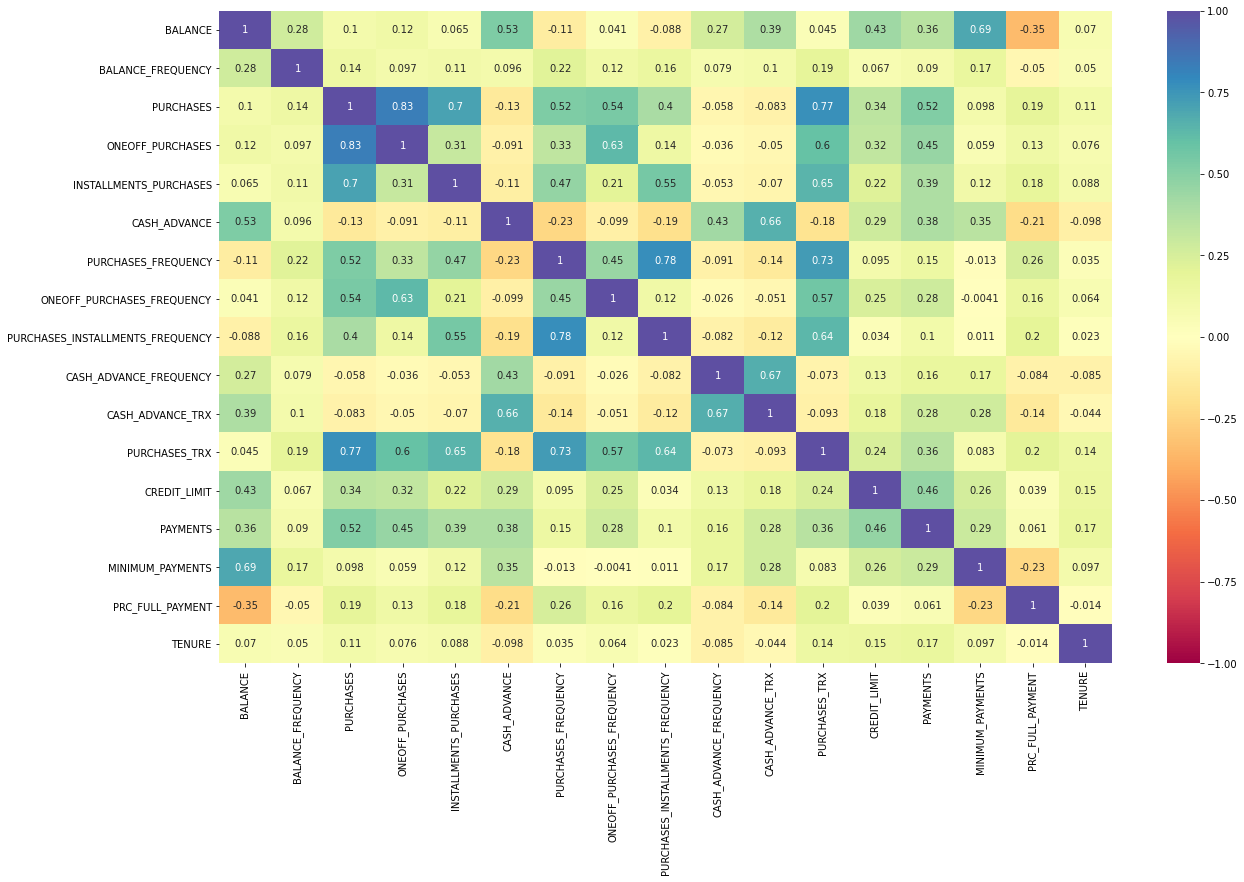

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), vmin=-1, cmap='Spectral', annot=True);

# Pendefinisian Model

In [23]:
X = df

In [24]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [25]:
X.shape

(8636, 17)

Menggunakan metode elbow untuk menentukan angka cluster

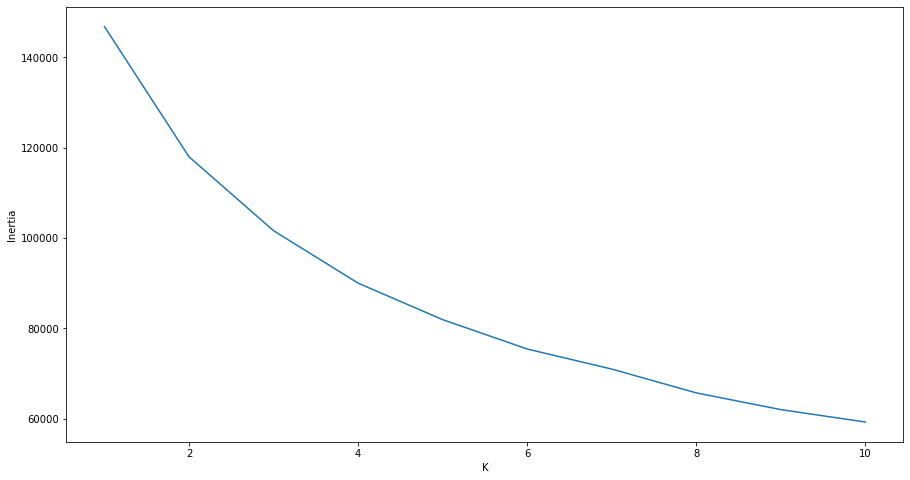

In [26]:
K=[1,2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.subplots(figsize=(15,8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show();

# Pelatihan Model

In [27]:
kmeans= KMeans(n_clusters=6, random_state=42)

%time kmeans.fit(X)

Wall time: 248 ms


KMeans(n_clusters=6, random_state=42)

In [28]:
dbscan = DBSCAN(eps=0.05, min_samples=6)

%time dbscan.fit(X)

Wall time: 1.64 s


DBSCAN(eps=0.05, min_samples=6)

In [29]:
agglo = AgglomerativeClustering(n_clusters=6, linkage="ward")

%time agglo.fit(X)

Wall time: 8.15 s


AgglomerativeClustering(n_clusters=6)

# K-Means

In [30]:
kmeans_segment = kmeans.labels_

In [31]:
data_kmeans = df.copy()
data_kmeans['kmeans_cluster'] = kmeans_segment
data_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster
0,1,1,1,1,1,1,0,0,0,0,1,1,2,1,1,0,3,0
1,4,1,1,1,1,5,0,0,0,0,1,1,5,4,3,0,3,0
2,3,1,2,2,1,1,1,1,0,0,1,3,6,2,2,0,3,1
4,2,1,1,1,1,1,0,0,0,0,1,1,3,2,1,0,3,0
5,3,1,3,1,3,1,1,0,1,0,1,2,3,3,3,0,3,2


# DBSCAN

In [32]:
dbscan_segment = dbscan.labels_

In [33]:
data_dbscan = df.copy()
data_dbscan['dbscan_cluster'] = dbscan_segment
data_dbscan.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,dbscan_cluster
0,1,1,1,1,1,1,0,0,0,0,1,1,2,1,1,0,3,0
1,4,1,1,1,1,5,0,0,0,0,1,1,5,4,3,0,3,-1
2,3,1,2,2,1,1,1,1,0,0,1,3,6,2,2,0,3,-1
4,2,1,1,1,1,1,0,0,0,0,1,1,3,2,1,0,3,1
5,3,1,3,1,3,1,1,0,1,0,1,2,3,3,3,0,3,-1


# Agglomerative Clustering

In [34]:
agglo_segment = agglo.labels_

In [35]:
data_ac = df.copy()
data_ac['dbscan_cluster'] = agglo_segment
data_ac.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,dbscan_cluster
0,1,1,1,1,1,1,0,0,0,0,1,1,2,1,1,0,3,0
1,4,1,1,1,1,5,0,0,0,0,1,1,5,4,3,0,3,0
2,3,1,2,2,1,1,1,1,0,0,1,3,6,2,2,0,3,3
4,2,1,1,1,1,1,0,0,0,0,1,1,3,2,1,0,3,0
5,3,1,3,1,3,1,1,0,1,0,1,2,3,3,3,0,3,1


# Visualisasi Model Clustering menggunakan PCA

In [36]:
pca = PCA(2)
pca.fit(X)
X_PCA = pca.transform(X)

In [37]:
# melakukan prediksi kmeans dengan data x
y_kmeans = kmeans.fit_predict(X)

In [38]:
# melakukan prediksi dbscan dengan data x
y_dbscan = dbscan.fit_predict(X)

In [39]:
# melakukan prediksi AC dengan data x
y_agglo = agglo.fit_predict(X)

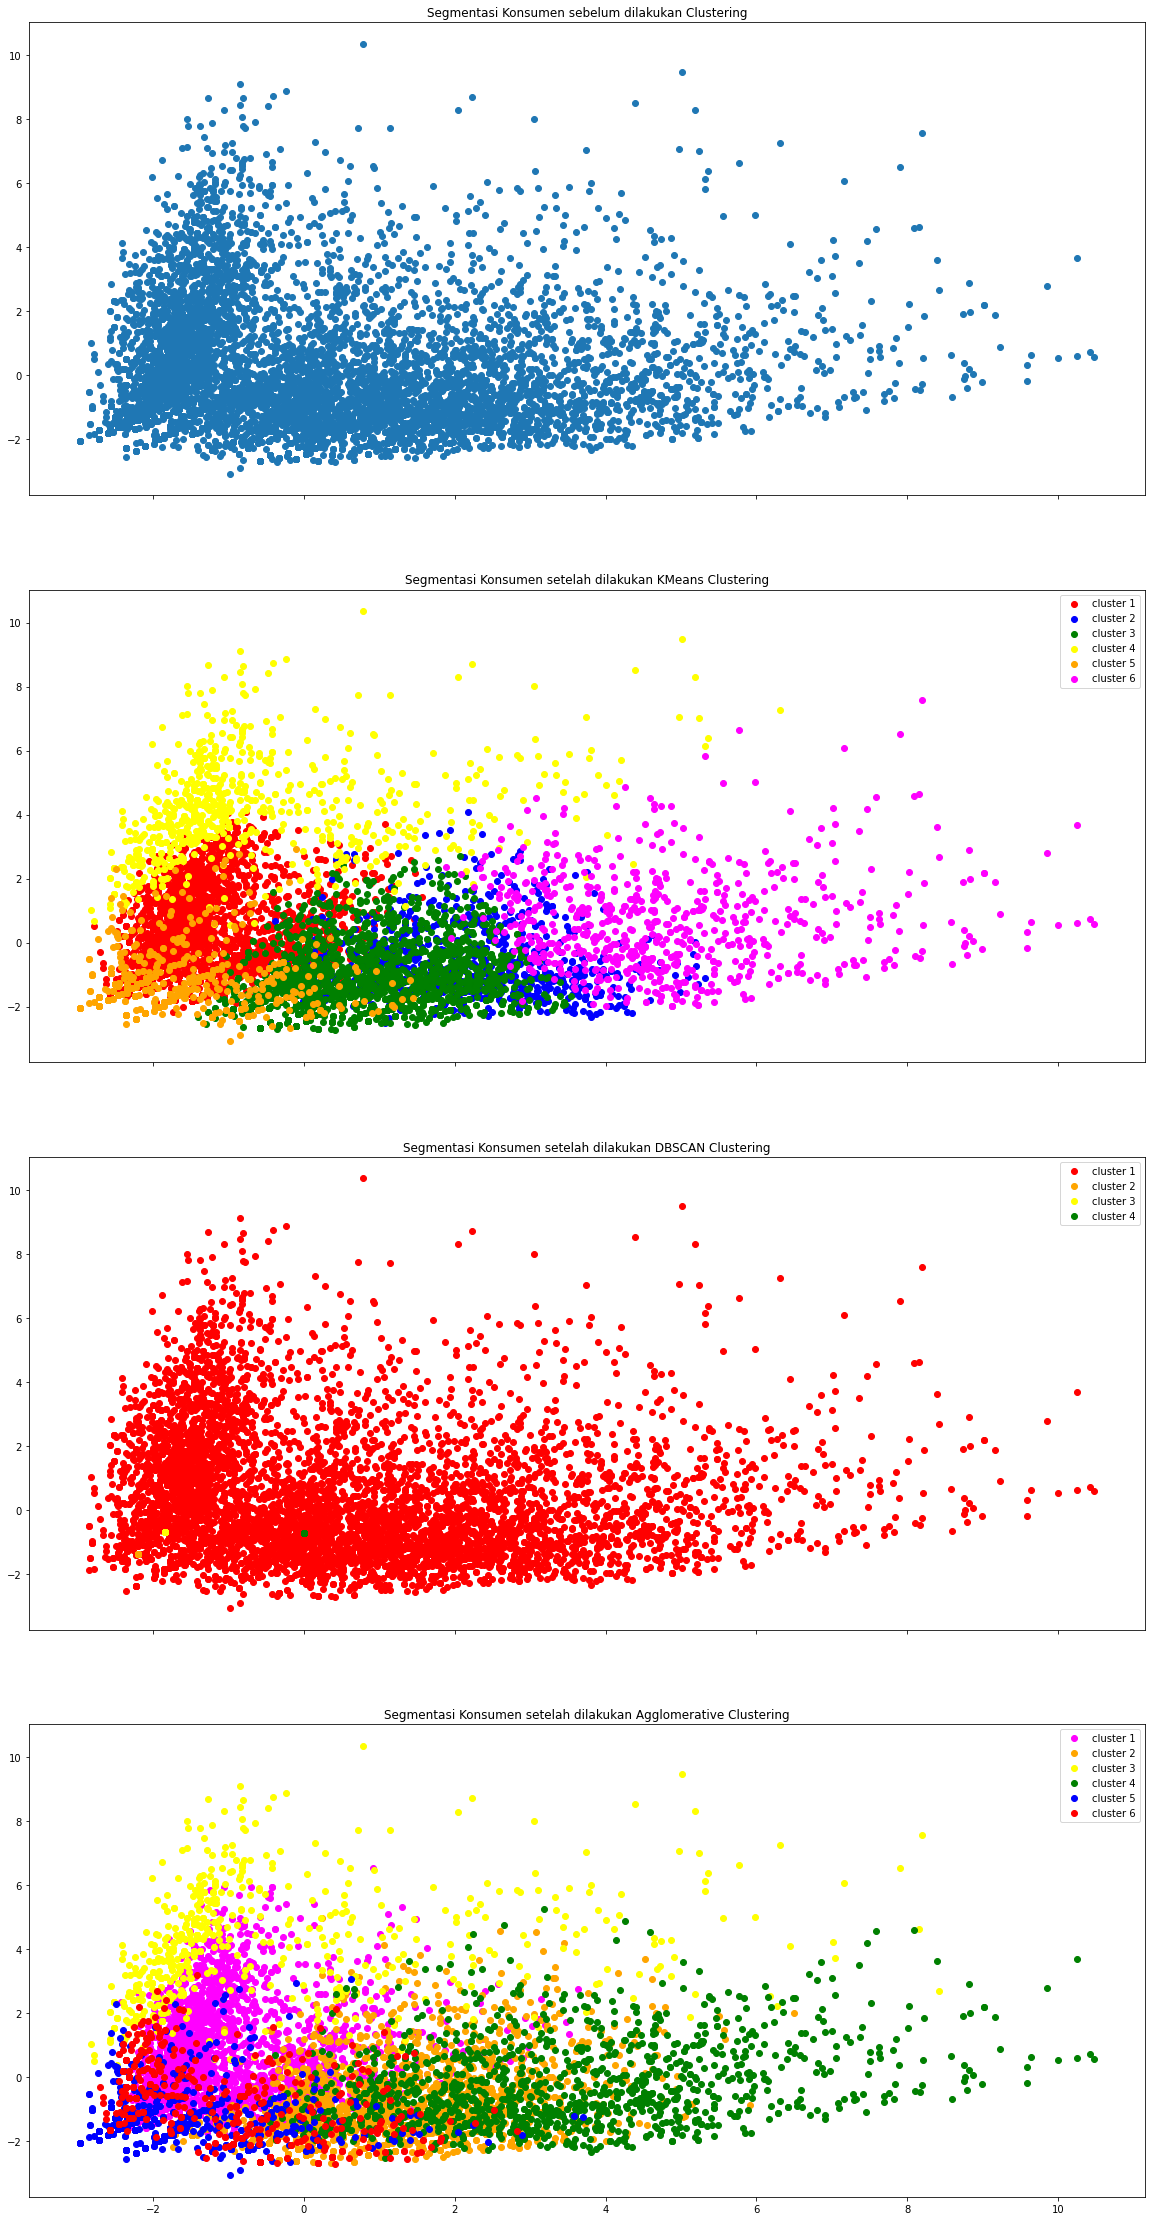

In [40]:
# Subplots of chol, age thalach
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4,
                                      ncols=1,
                                      figsize=(20,40),
                                      sharex=True
                                     )
# add data to ax0
scatter = ax0.scatter(X_PCA[:, 0], X_PCA[:, 1]);

# customize ax0
ax0.set(title='Segmentasi Konsumen sebelum dilakukan Clustering');

# add data to ax1
scatter = ax1.scatter(X_PCA[y_kmeans == 0, 0], X_PCA[y_kmeans == 0, 1], c='red', label='cluster 1');
scatter = ax1.scatter(X_PCA[y_kmeans == 1, 0], X_PCA[y_kmeans == 1, 1], c='blue', label='cluster 2');
scatter = ax1.scatter(X_PCA[y_kmeans == 2, 0], X_PCA[y_kmeans == 2, 1], c='green', label='cluster 3');
scatter = ax1.scatter(X_PCA[y_kmeans == 3, 0], X_PCA[y_kmeans == 3, 1], c='yellow', label='cluster 4');
scatter = ax1.scatter(X_PCA[y_kmeans == 4, 0], X_PCA[y_kmeans == 4, 1], c='orange', label='cluster 5');
scatter = ax1.scatter(X_PCA[y_kmeans == 5, 0], X_PCA[y_kmeans == 5, 1], c='magenta', label='cluster 6');

# customize ax1
ax1.set(title='Segmentasi Konsumen setelah dilakukan KMeans Clustering');

# add legend ax1
ax1.legend();

# add data to ax2
scatter = ax2.scatter(X_PCA[y_dbscan== -1, 0], X_PCA[y_dbscan == -1, 1], c='red' , label='cluster 1');
scatter = ax2.scatter(X_PCA[y_dbscan == 0, 0], X_PCA[y_dbscan == 0, 1], c='orange' , label='cluster 2');
scatter = ax2.scatter(X_PCA[y_dbscan == 1, 0], X_PCA[y_dbscan == 1, 1], c='yellow', label='cluster 3');
scatter = ax2.scatter(X_PCA[y_dbscan == 2, 0], X_PCA[y_dbscan == 2, 1], c='green' , label='cluster 4');


# customize ax2
ax2.set(title='Segmentasi Konsumen setelah dilakukan DBSCAN Clustering');

# add legend ax2
ax2.legend();

# add data to ax3
scatter = ax3.scatter(X_PCA[y_agglo == 0, 0], X_PCA[y_agglo == 0, 1], c='magenta' , label='cluster 1');
scatter = ax3.scatter(X_PCA[y_agglo == 1, 0], X_PCA[y_agglo == 1, 1], c='orange' , label='cluster 2');
scatter = ax3.scatter(X_PCA[y_agglo == 2, 0], X_PCA[y_agglo == 2, 1], c='yellow', label='cluster 3');
scatter = ax3.scatter(X_PCA[y_agglo == 3, 0], X_PCA[y_agglo == 3, 1], c='green' , label='cluster 4');
scatter = ax3.scatter(X_PCA[y_agglo == 4, 0], X_PCA[y_agglo == 4, 1],  c='blue', label='cluster 5');
scatter = ax3.scatter(X_PCA[y_agglo == 5, 0], X_PCA[y_agglo == 5, 1], c='red', label='cluster 6');

# customize ax3
ax3.set(title='Segmentasi Konsumen setelah dilakukan Agglomerative Clustering');

# add legend ax3
ax3.legend();


# Model Inference

In [41]:
values_1 = [3, 10, 3, 1, 3, 1, 7, 1, 6, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_2 = [3, 9, 3, 1, 3, 1, 6, 1, 5, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_3 = [3, 8, 3, 1, 3, 1, 5, 1, 4, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_4 = [3, 7, 3, 1, 3, 1, 4, 1, 3, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_5 = [3, 6, 3, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_6 = [3, 5, 3, 1, 3, 1, 2, 1, 1, 1, 1, 2, 3, 3, 3, 1, 12 ]

In [42]:
values = [ values_1, values_2, values_3, values_4, values_5, values_6 ] 

In [43]:
data_dummies = pd.DataFrame(values, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

In [44]:
data_dummies

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3,10,3,1,3,1,7,1,6,1,1,2,3,3,3,1,12
1,3,9,3,1,3,1,6,1,5,1,1,2,3,3,3,1,12
2,3,8,3,1,3,1,5,1,4,1,1,2,3,3,3,1,12
3,3,7,3,1,3,1,4,1,3,1,1,2,3,3,3,1,12
4,3,6,3,1,3,1,3,1,2,1,1,2,3,3,3,1,12
5,3,5,3,1,3,1,2,1,1,1,1,2,3,3,3,1,12


# Melakukan prediksi dengan KMeans Clustering

In [45]:
predictions_kmeans = kmeans.fit_predict(data_dummies)

print("Hasil prediksi model KMeans Clustering: \n")
print('Konsumen Kartu kredit 1 termasuk dalam cluster {}'.format(predictions_kmeans[0]))
print('Konsumen Kartu kredit 2 termasuk dalam cluster {}'.format(predictions_kmeans[1]))
print('Konsumen Kartu kredit 3 termasuk dalam cluster {}'.format(predictions_kmeans[2]))
print('Konsumen Kartu kredit 4 termasuk dalam cluster {}'.format(predictions_kmeans[3]))
print('Konsumen Kartu kredit 5 termasuk dalam cluster {}'.format(predictions_kmeans[4]))
print('Konsumen Kartu kredit 6 termasuk dalam cluster {}'.format(predictions_kmeans[5]))

Hasil prediksi model KMeans Clustering: 

Konsumen Kartu kredit 1 termasuk dalam cluster 1
Konsumen Kartu kredit 2 termasuk dalam cluster 5
Konsumen Kartu kredit 3 termasuk dalam cluster 4
Konsumen Kartu kredit 4 termasuk dalam cluster 0
Konsumen Kartu kredit 5 termasuk dalam cluster 3
Konsumen Kartu kredit 6 termasuk dalam cluster 2


# Melakukan prediksi dengan DBSCAN Clustering

In [46]:
predictions_dbscan = dbscan.fit_predict(data_dummies)

print("Hasil prediksi model DBSCAN Clustering: \n")
print('Konsumen Kartu kredit 1 termasuk dalam cluster {}'.format(predictions_dbscan[0]))
print('Konsumen Kartu kredit 2 termasuk dalam cluster {}'.format(predictions_dbscan[1]))
print('Konsumen Kartu kredit 3 termasuk dalam cluster {}'.format(predictions_dbscan[2]))
print('Konsumen Kartu kredit 4 termasuk dalam cluster {}'.format(predictions_dbscan[3]))
print('Konsumen Kartu kredit 5 termasuk dalam cluster {}'.format(predictions_dbscan[4]))
print('Konsumen Kartu kredit 6 termasuk dalam cluster {}'.format(predictions_dbscan[5]))

Hasil prediksi model DBSCAN Clustering: 

Konsumen Kartu kredit 1 termasuk dalam cluster -1
Konsumen Kartu kredit 2 termasuk dalam cluster -1
Konsumen Kartu kredit 3 termasuk dalam cluster -1
Konsumen Kartu kredit 4 termasuk dalam cluster -1
Konsumen Kartu kredit 5 termasuk dalam cluster -1
Konsumen Kartu kredit 6 termasuk dalam cluster -1


# Melakukan prediksi dengan AgglomerativeClustering

In [47]:
predictions_ac = agglo.fit_predict(data_dummies)

print("Hasil prediksi model Agglomerative Clustering: \n")
print('Konsumen Kartu kredit 1 termasuk dalam cluster {}'.format(predictions_ac[0]))
print('Konsumen Kartu kredit 2 termasuk dalam cluster {}'.format(predictions_ac[1]))
print('Konsumen Kartu kredit 3 termasuk dalam cluster {}'.format(predictions_ac[2]))
print('Konsumen Kartu kredit 4 termasuk dalam cluster {}'.format(predictions_ac[3]))
print('Konsumen Kartu kredit 5 termasuk dalam cluster {}'.format(predictions_ac[4]))
print('Konsumen Kartu kredit 6 termasuk dalam cluster {}'.format(predictions_ac[5]))

Hasil prediksi model Agglomerative Clustering: 

Konsumen Kartu kredit 1 termasuk dalam cluster 5
Konsumen Kartu kredit 2 termasuk dalam cluster 3
Konsumen Kartu kredit 3 termasuk dalam cluster 4
Konsumen Kartu kredit 4 termasuk dalam cluster 2
Konsumen Kartu kredit 5 termasuk dalam cluster 1
Konsumen Kartu kredit 6 termasuk dalam cluster 0


# Model Analysis

Analysis model inference :

dari hasil mencoba data baru untuk melakukan prediksi menggunakan model clustering Kmeans, DBSCAN dan Angglomerative dapat ditarik informasi sebagai berikut:

- Dalam setiap Perubahan pada nilai features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY akan mengakibatkan atau merubah type cluster konsumen pada model clustering KMeans dan Angglomerative

- Setiap perubahan type cluster konsumen dalam model Agglomerative bersifat berbanding lurus dengan perubahan nilai features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY atau perubahan terjadi berurutan berdasarkan dari nilai features terkecil

- Setiap perubahan type cluster konsumen dalam model KMeans bersifat randomize (acak) dengan perubahan nilai features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY atau perubahan terjadi tidak terpengaruh dari urutan nilai features

- Hasil prediksi dengan menggunakan data baru untuk model DBSCAN Clustering hanya menghasilkan satu type cluster konsumen saja

Pemilihan Model :

- Berdasarkan perbandingan antara algoritma model KMeans, DBSCAN, dan Agglomerative maka model yang dipilih adalah model Clustering KMeans karena menghasilkan hasil clustering yang lebih beragam (randomize) dan juga memiliki waktu training yang lebih singkat dibandingkan dengan model yang lainnya.

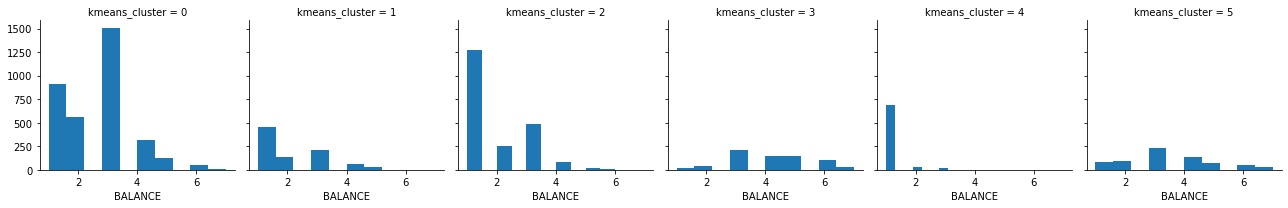

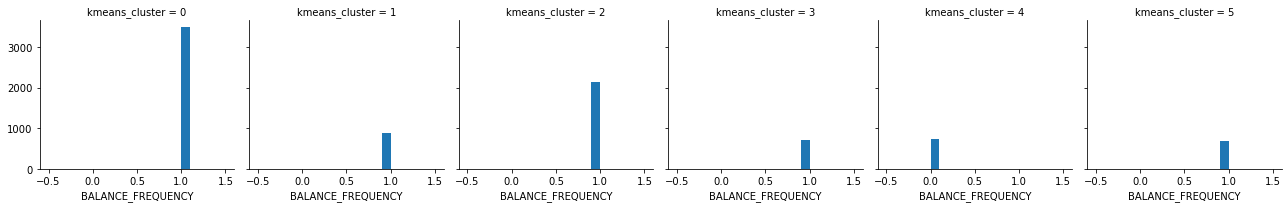

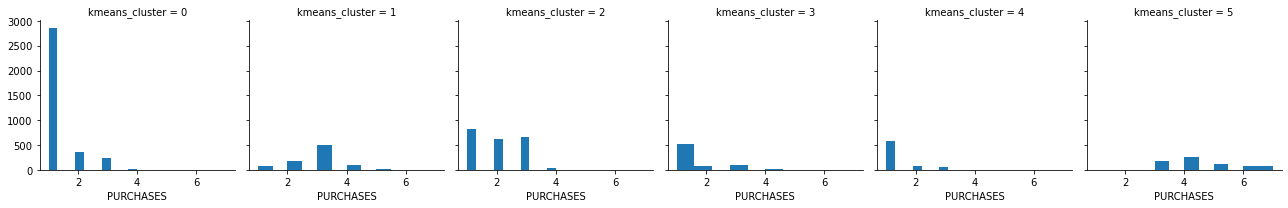

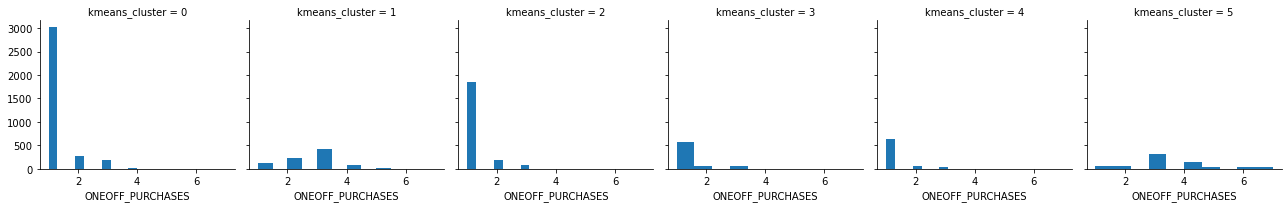

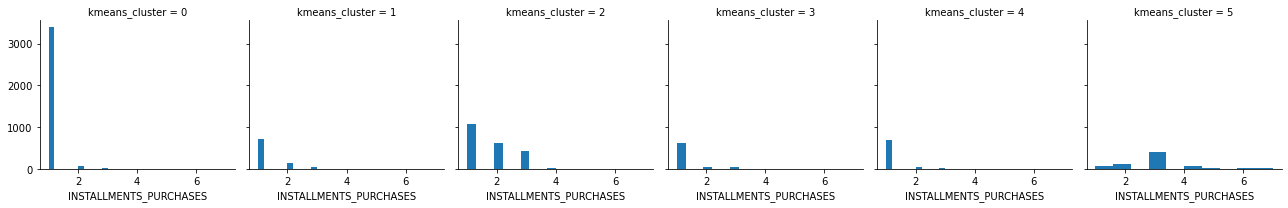

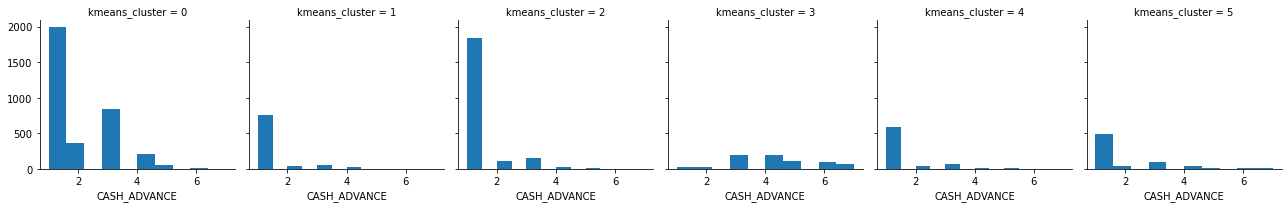

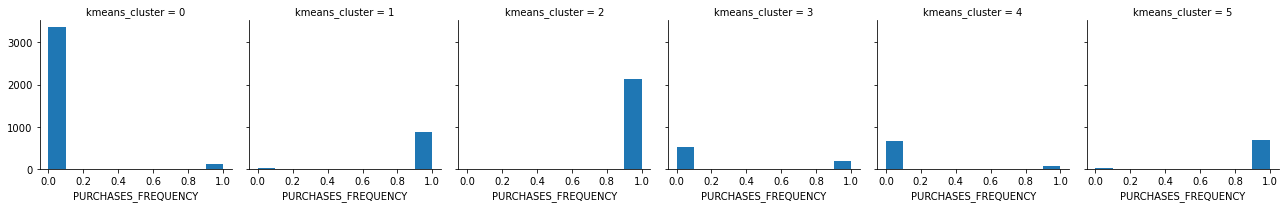

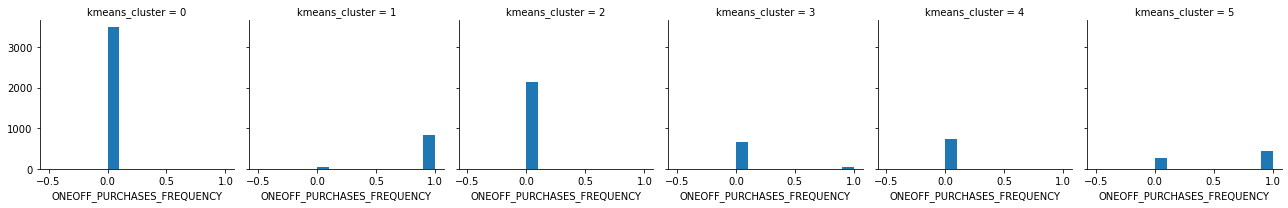

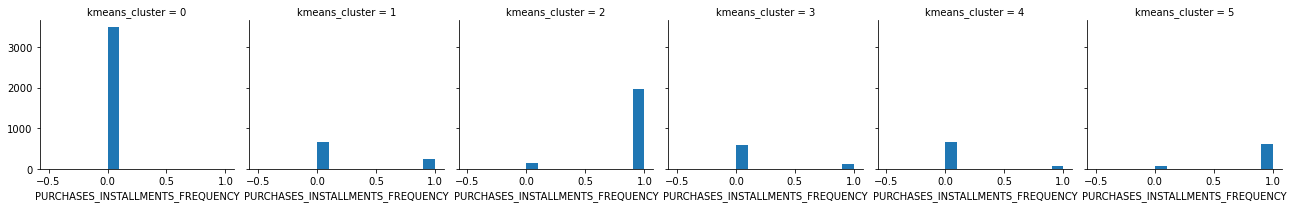

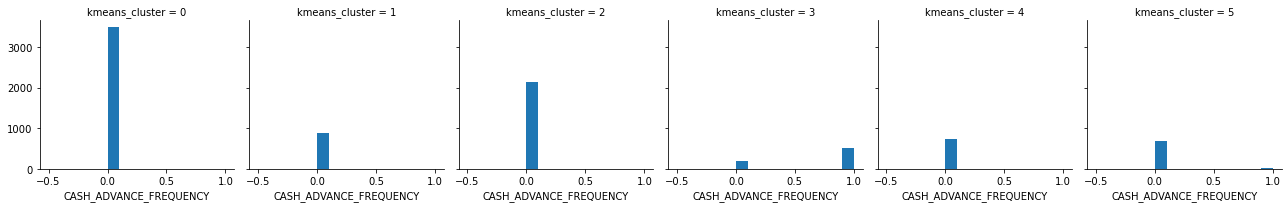

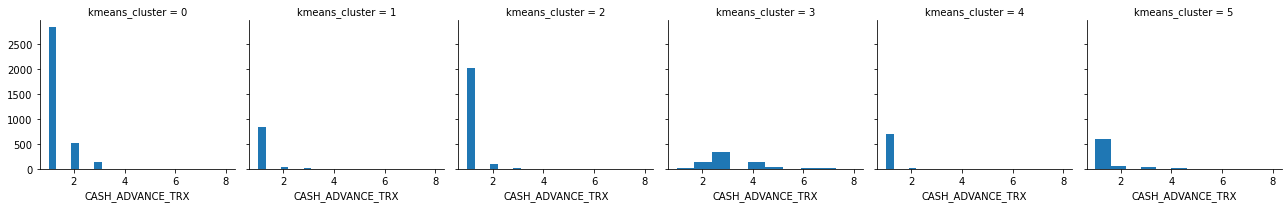

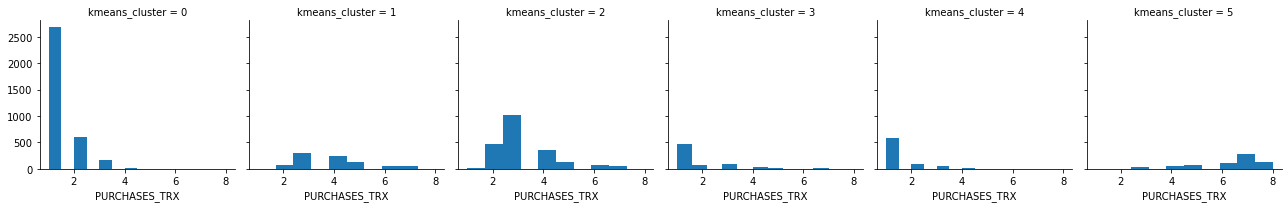

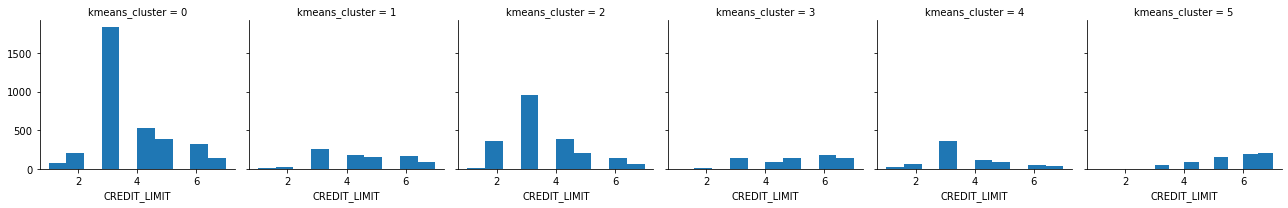

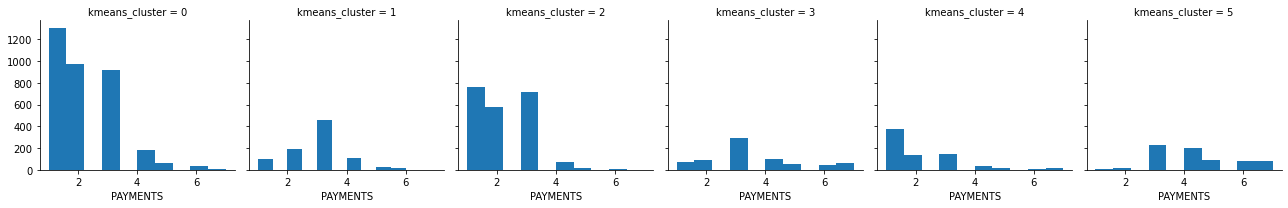

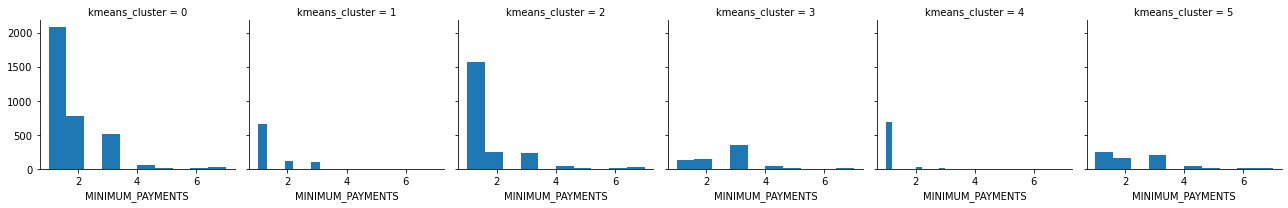

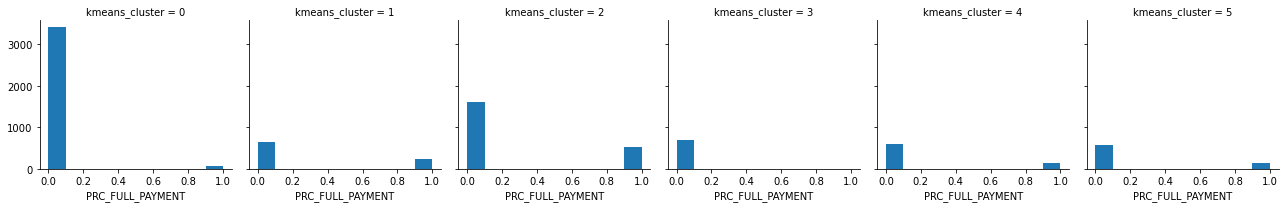

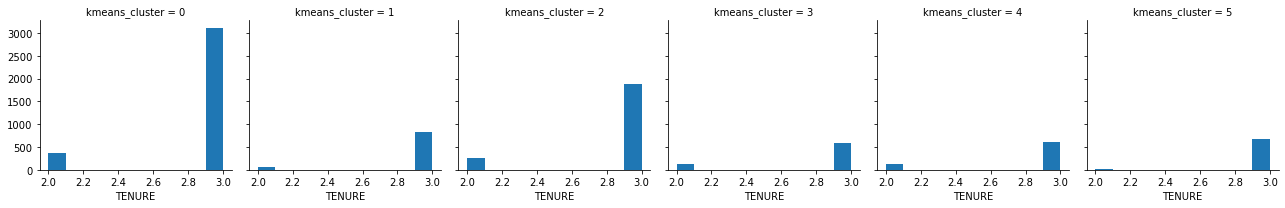

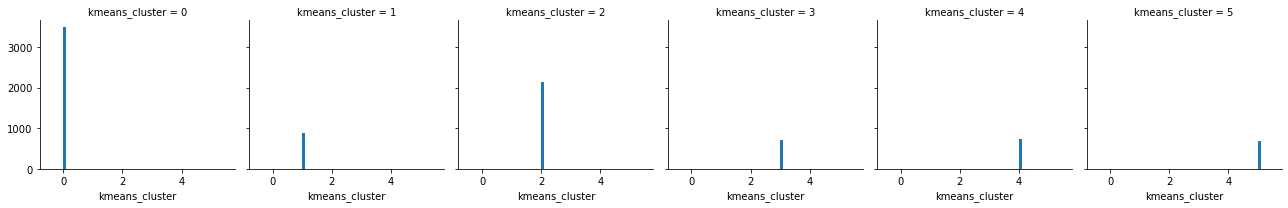

In [48]:
for col in data_kmeans:
    grid = sns.FacetGrid(data_kmeans, col='kmeans_cluster')
    grid.map(plt.hist, col)

- Cluster 1 : PURCHASE_TRX & PURCHASE_FREQUENCY

- Cluster 2 : PURCHASE_FREQUENCY & ONEOFF_PURCHASE_FREQUENCY

- Cluster 3 : PURCHASE_FREQUENCY & ONEOFF_PURCHASE_INSTALLMENST_FREQUENCY

- Cluster 4 : CASH_ADVANCE_FREQUENCY

- Cluster 5 : PURCHASE & ONE_OFF_PURCHASES

- Cluster 6 : PURCHASE_FREQUENCY & ONEOFF_PURCHASE_FREQUENCY